# CITE-Seq Protein/mRNA Data Exploration

In [1]:
%matplotlib inline

In [41]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time
import imp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from skbio.stats.composition import clr

In [3]:
data_path = '/Users/mincheolkim/Google Drive/UCSF/research/parameter_estimation/'

In [4]:
import sys
sys.path.append('/Users/mincheolkim/Github/scrna-parameter-estimation/')

In [5]:
import method_1d as md

### Protein and mRNA Histograms

In [6]:
adt_data = pd.read_csv(data_path + 'adt.csv')

In [7]:
rna_data = pd.read_csv(data_path + 'mrna.csv')

In [8]:
rna_data.columns

Index(['CD45', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype='object')

Text(0.5,1,'CD4 RNA Distribution')

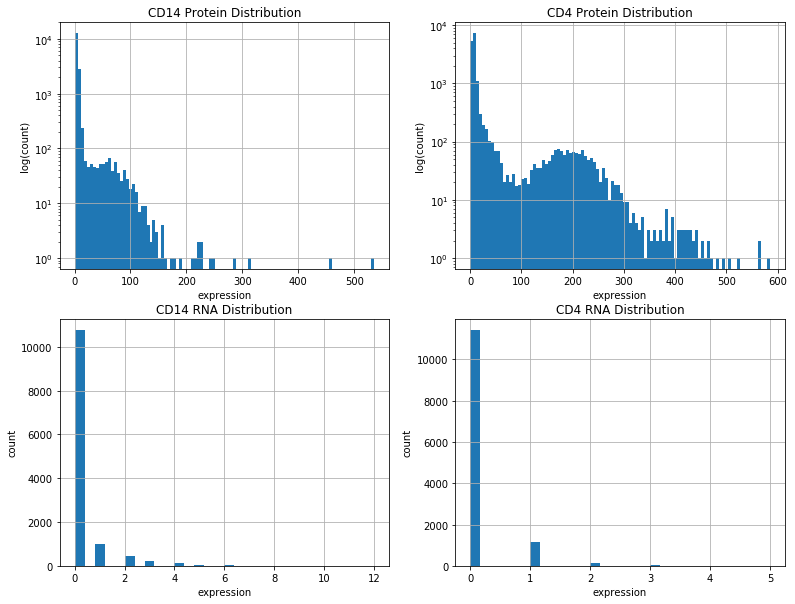

In [9]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
adt_data.CD14[adt_data.CD14 < 600].hist(bins=100)
plt.yscale('log', nonposy='clip')
plt.ylabel('log(count)'); plt.xlabel('expression')
plt.title('CD14 Protein Distribution')
plt.subplot(2, 2, 2)
adt_data.CD4[adt_data.CD4 < 600].hist(bins=100)
plt.yscale('log', nonposy='clip')
plt.ylabel('log(count)'); plt.xlabel('expression')
plt.title('CD4 Protein Distribution')
plt.subplot(2, 2, 3)
rna_data.CD14.hist(bins=30)
plt.ylabel('count'); plt.xlabel('expression')
plt.title('CD14 RNA Distribution')
plt.subplot(2, 2, 4)
rna_data.CD4.hist(bins=30)
plt.ylabel('count'); plt.xlabel('expression')
plt.title('CD4 RNA Distribution')

### Separate out CD4+ from CD14+

In [27]:
clr_adt_data = (adt_data+1).apply(lambda x: clr(x))

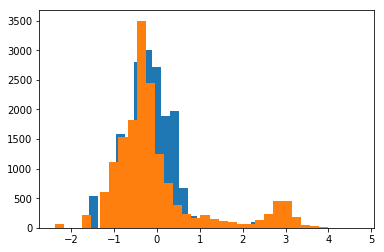

In [26]:
plt.hist(clr_adt_data.CD14, bins=30);

In [47]:
subset = clr_adt_data.query('CD14 > 2 | CD4 > 2')

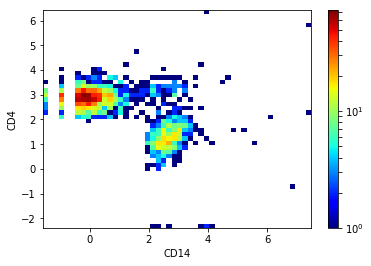

In [57]:
plt.hist2d(subset.CD14, subset.CD4, bins=(50, 50), cmap=plt.cm.jet, norm=mpl.colors.LogNorm());
plt.colorbar(); plt.xlabel('CD14'); plt.ylabel('CD4');

### Fit 1D RNA 

In [20]:
cd14_observed = rna_data.CD14.values
cd4_observed = rna_data.CD4.values

In [21]:
imp.reload(md)

<module 'method_1d' from '/Users/mincheolkim/Github/scrna-parameter-estimation/method_1d.py'>

In [22]:
cd14_mu, _ , cd14_progress_pdf = md.run_1d_em(cd14_observed, method='pdf')
_, cd14_std , cd14_progress_pmf = md.run_1d_em(cd14_observed, method='pmf')

In [23]:
cd4_mu, _ , cd4_progress_pdf = md.run_1d_em(cd4_observed, method='pdf')
_, cd4_std , cd4_progress_pmf = md.run_1d_em(cd4_observed, method='pmf')

/Users/mincheolkim/Github/scrna-parameter-estimation/method_1d.py:30: RuntimeWarning: invalid value encountered in double_scalars
  table[x, z] = gaussian_pmf(z, mu, sigma, method) * stats.binom.pmf(x, z, p) / px_table[x]


In [24]:
imp.reload(md)

<module 'method_1d' from '/Users/mincheolkim/Github/scrna-parameter-estimation/method_1d.py'>

In [25]:
reconstructed_cd4 = md.reconstruct_distribution(cd4_mu, cd4_std)
reconstructed_cd14 = md.reconstruct_distribution(cd14_mu, cd14_std)

In [26]:
cd4_mu

1.3292788261101975

In [27]:
cd4_std

0.9952506672491306

### Show all distributions

(0, 4000)

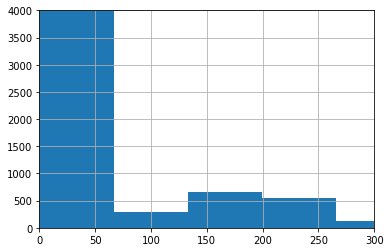

In [28]:
adt_data.CD4.hist(bins=100)
plt.xlim((0, 300));
plt.ylim((0, 4000))

Text(0.5,1,'CD4 Reconstructed RNA Distribution')

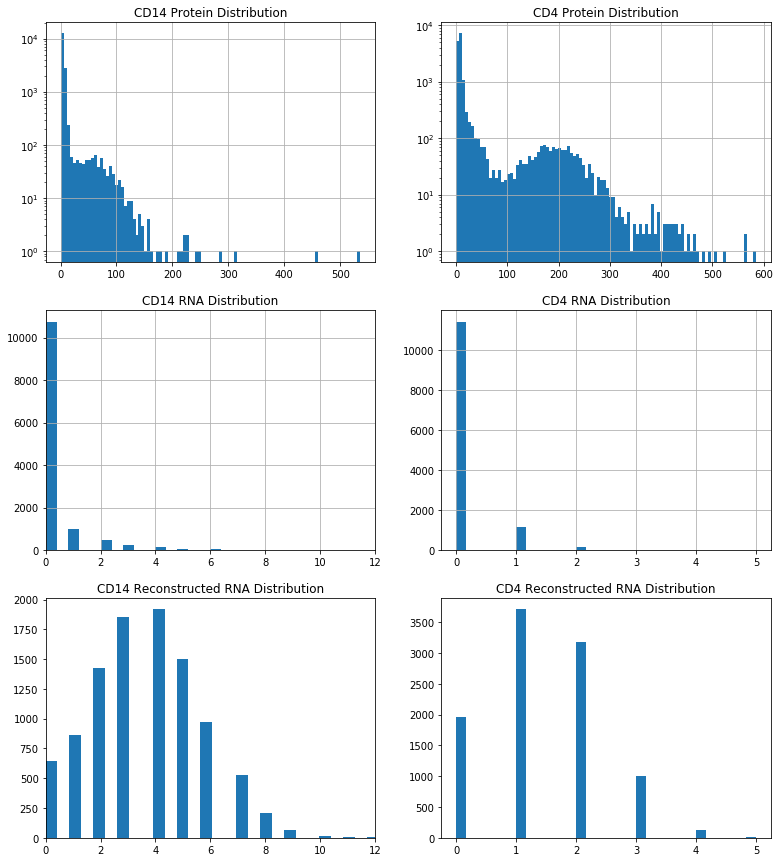

In [29]:
plt.figure(figsize=(13, 15))
plt.subplot(3, 2, 1)
adt_data.CD14[adt_data.CD14 < 600].hist(bins=100)
plt.yscale('log', nonposy='clip')
plt.title('CD14 Protein Distribution')

plt.subplot(3, 2, 2)
adt_data.CD4[adt_data.CD4 < 600].hist(bins=100)
plt.yscale('log', nonposy='clip')
plt.title('CD4 Protein Distribution')

plt.subplot(3, 2, 3)
rna_data.CD14.hist(bins=30)
plt.xlim((0, 12));
plt.title('CD14 RNA Distribution')

plt.subplot(3, 2, 4)
rna_data.CD4.hist(bins=30)
plt.title('CD4 RNA Distribution')

plt.subplot(3, 2, 5)
plt.hist(reconstructed_cd14, bins=30)
plt.xlim((0, 12));
plt.title('CD14 Reconstructed RNA Distribution')

plt.subplot(3, 2, 6)
plt.hist(reconstructed_cd4, bins=30)
plt.title('CD4 Reconstructed RNA Distribution')